<a href="https://colab.research.google.com/github/kevin-weis/ultimate-tech-takehome/blob/main/takehome_predictivemodeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import json

In [2]:
ultimate_data_challenge = pd.read_json("/content/drive/MyDrive/ultimate_tech_takehome/ultimate_data_challenge.json")
df = pd.DataFrame(ultimate_data_challenge)

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [5]:
df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver'],
      dtype='object')

In [6]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [7]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [9]:
df.last_trip_date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [10]:
df.signup_date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   50000
unique                     31
top       2014-01-18 00:00:00
freq                     2948
first     2014-01-01 00:00:00
last      2014-01-31 00:00:00
Name: signup_date, dtype: object

In [11]:
fraction_retained = (df.last_trip_date >= '2014-06-01').sum() / (df.last_trip_date >= ' 2014-06-01').count()
fraction_retained

0.37608

In [12]:
df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.376080
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.484405
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000


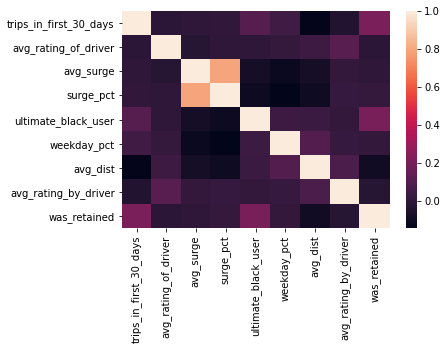

In [13]:
sns.heatmap(df.corr())

In [14]:
corr = df.corr()
corr['was_retained'].sort_values(ascending=False)

was_retained              1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
Name: was_retained, dtype: float64

In [15]:
df.city.value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

In [16]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [17]:
df.phone.isnull().sum()

396

In [18]:
df.phone.fillna("Other", inplace=True)
df.phone.value_counts()

iPhone     34582
Android    15022
Other        396
Name: phone, dtype: int64

In [19]:
cities_onehot = pd.get_dummies(df['city'])
phones_onehot = pd.get_dummies(df['phone'])

In [20]:
df = df.join(cities_onehot).join(phones_onehot)
df.drop(['city', 'phone'], axis=1, inplace=True)

In [21]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,was_retained,Astapor,King's Landing,Winterfell,Android,Other,iPhone
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.376080,0.330680,0.202600,0.466720,0.300440,0.007920,0.691640
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.484405,0.470463,0.401941,0.498896,0.458454,0.088642,0.461821
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
categoricals = df.iloc[:, 10:]
categoricals

,was_retained,Astapor,King's Landing,Winterfell,Android,Other,iPhone
0,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0
2,0,1,0,0,0,0,1
3,1,0,1,0,0,0,1
4,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...
49995,1,0,1,0,0,0,1
49996,0,1,0,0,0,0,1
49997,0,0,0,1,1,0,0
49998,0,1,0,0,0,0,1


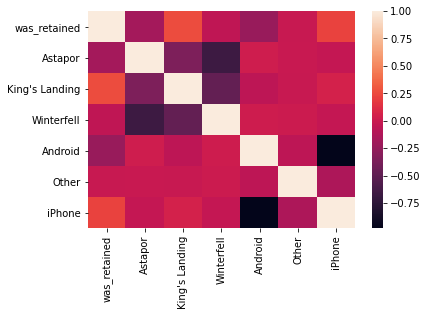

In [23]:
sns.heatmap(categoricals.corr())

In [24]:
categoricals.corr().was_retained.sort_values(ascending=False)

was_retained      1.000000
King's Landing    0.262284
iPhone            0.225244
Other            -0.007419
Winterfell       -0.046611
Astapor          -0.174655
Android          -0.225464
Name: was_retained, dtype: float64

In [25]:
df['signup_date'] = df['signup_date'].dt.strftime("%Y%m%d").astype(int) - 20140100

In [26]:
df['signup_date'].corr(df['was_retained'])

-0.02021061843484827

In [27]:
ref = min(df['last_trip_date'])
df['last_trip_date'] = (df['last_trip_date'] - ref).dt.days + 1

In [28]:
df['last_trip_date'].corr(df['was_retained'])

0.7808374961937247

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   signup_date             50000 non-null  int64  
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   last_trip_date          50000 non-null  int64  
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    49799 non-null  float64
 10  was_retained            50000 non-null  int64  
 11  Astapor                 50000 non-null  uint8  
 12  King's Landing          50000 non-null  uint8  
 13  Winterfell              50000 non-null  uint8  
 14  Android                 50000 non-null

In [30]:
df['ultimate_black_user'] = df['ultimate_black_user']*1

In [31]:
df.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,was_retained,Astapor,King's Landing,Winterfell,Android,Other,iPhone
count,50000.000000,50000.00000,41878.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,49799.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,16.54468,4.601559,1.074764,109.334780,8.849536,0.37708,60.926084,5.796827,4.778158,0.376080,0.330680,0.202600,0.466720,0.300440,0.007920,0.691640
std,3.792684,8.75422,0.617338,0.222336,61.718985,19.958811,0.48466,37.081503,5.707357,0.446652,0.484405,0.470463,0.401941,0.498896,0.458454,0.088642,0.461821
min,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.00000,4.300000,1.000000,45.000000,0.000000,0.00000,33.300000,2.420000,4.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,17.00000,4.900000,1.000000,128.000000,0.000000,0.00000,66.700000,3.880000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.000000,24.00000,5.000000,1.050000,169.000000,8.600000,1.00000,100.000000,6.940000,5.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,125.000000,31.00000,5.000000,8.000000,182.000000,100.000000,1.00000,100.000000,160.960000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
import time

In [33]:
data = pd.read_json("/content/drive/MyDrive/ultimate_tech_takehome/ultimate_data_challenge.json")
df = pd.DataFrame(data)

df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100
df['last_trip_date'] = (df['last_trip_date'] - min(df['last_trip_date'])).dt.days + 1

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  int64  
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  int64  
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
 12  was_retained            50000 non-null  int64  
dtypes: bool(1), float64(6), int64(4), object(2)
memory usage: 4.6+ MB


In [34]:
np.random.seed(42)

df.phone.fillna('Other', inplace=True)
categorical_features = ['city', 'phone']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder())
]
)

numeric_features = [column for column in df.columns.tolist() if column not in categorical_features and
                    column not in ['last_trip_date', 'was_retained']]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
]
)

In [35]:

X = df.drop(['was_retained', 'last_trip_date'], axis=1)
y = df['was_retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)


In [36]:
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'AUC', 'Time to Train'], 
                       columns=['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'Naive Bayes'])
metrics

,Dummy Model,Logistic Regression,K Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest,Naive Bayes
accuracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precision,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recall,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time to Train,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
def train_and_score_model(model_name, estimator, param_grid=None, cv=5, iid=False):
    
    #### Step 5: Instantiate the CV Object
    
    if model_name in ['Dummy Model', 'Naive Bayes']:
        cv = estimator
    elif model_name == 'Logistic Regression':
        cv = GridSearchCV(estimator, param_grid, cv=cv, iid=False)
    else: 
        cv = RandomizedSearchCV(estimator, param_grid, cv=cv, iid=False, random_state=None)

    #### Step 6: Fit on Training
    t0 = time.time()
    cv.fit(X_train, y_train)
    ttt = time.time() - t0 # ttt stands for "time to train"
    print("It takes %.3f seconds for %s fitting" % (ttt, model_name))
    metrics.loc['Time to Train', model_name] = ttt

    #### Step 7: Predict on Test

    y_pred = cv.predict(X_test)

    #### Step 8: Scoring
    ##### Accuracy

    print("Accuracy with " + model_name + "on the testing set is: %.3f" % cv.score(X_test, y_test))

    metrics.loc['accuracy', model_name] = accuracy_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['precision', model_name] = precision_score(y_pred=y_pred, y_true=y_test)
    metrics.loc['recall', model_name] = recall_score(y_pred=y_pred, y_true=y_test)
    
    if model_name != 'Support Vector Machine':
        y_pred_prob = cv.predict_proba(X_test)[:,1]
        metrics.loc['AUC', model_name] = roc_auc_score(y_test, y_pred_prob)

    print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

    if model_name != 'Support Vector Machine':
        # ROC Curve
        fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
        plt.plot([0,1], [0,1], 'k--')
        plt.plot(fpr, tpr, label=model_name)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('%s ROC Curve' % model_name)
        plt.show()

    return cv

In [38]:

def Conf_Matrix(CM, labels=['Not Retained', 'Retained']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name = 'TRUE'
    df.columns.name = 'PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

In [39]:

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint


# Step 3: Instantiate the model/estimator
classifier_dm = DummyClassifier(strategy="most_frequent", random_state=0)
classifier_lr = LogisticRegression(solver='liblinear', random_state=0)
classifier_knn = KNeighborsClassifier()
classifier_svm = SVC(random_state=0)
classifier_dt = DecisionTreeClassifier(random_state=0)
classifier_rf = RandomForestClassifier(random_state=0)
classifier_nb = GaussianNB()

classifiers = [classifier_dm, classifier_lr, classifier_knn, classifier_svm, classifier_dt, classifier_rf, classifier_nb]

# Step 4: Specify the Hyperparameter Space
param_grid_dm = None
param_grid_lr = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': np.logspace(-5, 8, 15),
    'classifier__penalty': ['l1', 'l2']
}
param_grid_knn = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__n_neighbors': np.arange(1,20)
}
param_grid_svm = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01]
}
param_grid_dt = {
                'preprocessor__num__imputer__strategy': ['mean', 'median'],
                'classifier__max_depth': [3, 10, 20, None],
                'classifier__max_features': randint(1, 9),
                'classifier__min_samples_leaf': randint(1, 9),
                'classifier__min_samples_split': randint(2, 9),
                'classifier__criterion': ["gini", "entropy"]
}
param_grid_rf = {
                 'preprocessor__num__imputer__strategy': ['mean', 'median'], 
                 'classifier__n_estimators': [50, 100],
                 'classifier__criterion': ["gini", "entropy"],
                 'classifier__max_depth': [3, 10, 20, None],
                 'classifier__min_samples_leaf': randint(1, 9),
                 'classifier__min_samples_split': randint(2, 9),
                 'classifier__max_features': randint(1, 9)
}
param_grid_nb = None

param_grids = [param_grid_dm, param_grid_lr, param_grid_knn, param_grid_svm, param_grid_dt, param_grid_rf, param_grid_nb]

model_names = ['Dummy Model', 'Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machine', 'Decision Tree', 'Random Forest', 'Naive Bayes']
cv_names = ['dm_cv', 'lr_cv', 'knn_cv', 'svm_cv', 'dt_cv', 'rf_cv', 'nb_cv']
cvs = [None, 5, 5, 5, 5, 5, 5]

It takes 0.202 seconds for Dummy Model fitting
Accuracy with Dummy Modelon the testing set is: 0.624
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          9359         0   9359
Retained              5641         0   5641
Total                15000         0  15000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.62      1.00      0.77      9359
           1       0.00      0.00      0.00      5641

    accuracy                           0.62     15000
   macro avg       0.31      0.50      0.38     15000
weighted avg       0.39      0.62      0.48     15000



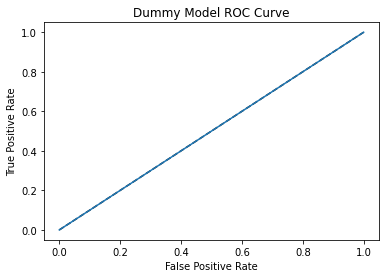

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


It takes 81.735 seconds for Logistic Regression fitting
Accuracy with Logistic Regressionon the testing set is: 0.716
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          7984      1375   9359
Retained              2880      2761   5641
Total                10864      4136  15000
              precision    recall  f1-score   support

           0       0.73      0.85      0.79      9359
           1       0.67      0.49      0.56      5641

    accuracy                           0.72     15000
   macro avg       0.70      0.67      0.68     15000
weighted avg       0.71      0.72      0.71     15000



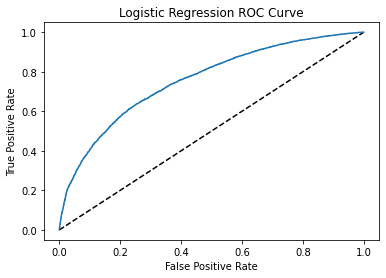

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


It takes 119.825 seconds for K Nearest Neighbors fitting
Accuracy with K Nearest Neighborson the testing set is: 0.754
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          7971      1388   9359
Retained              2306      3335   5641
Total                10277      4723  15000
              precision    recall  f1-score   support

           0       0.78      0.85      0.81      9359
           1       0.71      0.59      0.64      5641

    accuracy                           0.75     15000
   macro avg       0.74      0.72      0.73     15000
weighted avg       0.75      0.75      0.75     15000



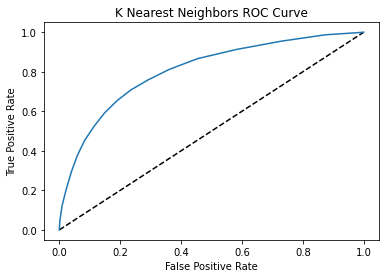

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


It takes 5525.542 seconds for Support Vector Machine fitting
Accuracy with Support Vector Machineon the testing set is: 0.765
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          8028      1331   9359
Retained              2191      3450   5641
Total                10219      4781  15000
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      9359
           1       0.72      0.61      0.66      5641

    accuracy                           0.77     15000
   macro avg       0.75      0.73      0.74     15000
weighted avg       0.76      0.77      0.76     15000



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


It takes 11.100 seconds for Decision Tree fitting
Accuracy with Decision Treeon the testing set is: 0.763
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          7850      1509   9359
Retained              2048      3593   5641
Total                 9898      5102  15000
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      9359
           1       0.70      0.64      0.67      5641

    accuracy                           0.76     15000
   macro avg       0.75      0.74      0.74     15000
weighted avg       0.76      0.76      0.76     15000



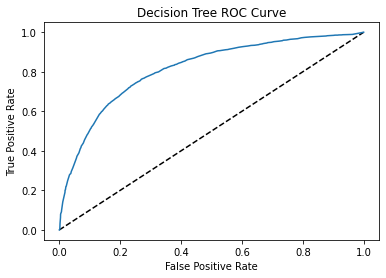

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


It takes 152.036 seconds for Random Forest fitting
Accuracy with Random Foreston the testing set is: 0.776
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          8013      1346   9359
Retained              2007      3634   5641
Total                10020      4980  15000
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      9359
           1       0.73      0.64      0.68      5641

    accuracy                           0.78     15000
   macro avg       0.76      0.75      0.76     15000
weighted avg       0.77      0.78      0.77     15000



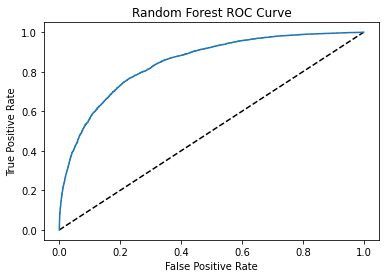

It takes 0.219 seconds for Naive Bayes fitting
Accuracy with Naive Bayeson the testing set is: 0.692
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          6419      2940   9359
Retained              1678      3963   5641
Total                 8097      6903  15000
              precision    recall  f1-score   support

           0       0.79      0.69      0.74      9359
           1       0.57      0.70      0.63      5641

    accuracy                           0.69     15000
   macro avg       0.68      0.69      0.68     15000
weighted avg       0.71      0.69      0.70     15000



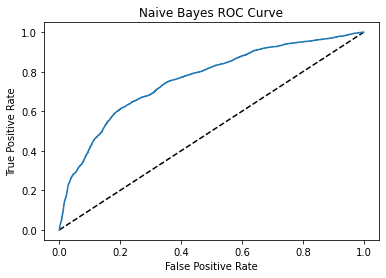

In [40]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                 ('classifier', classifier_dm)])
dm_cv = train_and_score_model('Dummy Model', pipeline, param_grid_dm)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_lr)])
lr_cv = train_and_score_model('Logistic Regression', pipeline, param_grid_lr)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_knn)])
knn_cv = train_and_score_model('K Nearest Neighbors', pipeline, param_grid_knn)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_svm)])
svm_cv = train_and_score_model('Support Vector Machine', pipeline, param_grid_svm)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_dt)])
dt_cv = train_and_score_model('Decision Tree', pipeline, param_grid_dt)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_rf)])
rf_cv = train_and_score_model('Random Forest', pipeline, param_grid_rf)


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', classifier_nb)])

nb_cv = train_and_score_model("Naive Bayes", pipeline, param_grid_nb)

In [41]:
from pandas.plotting import table
metrics.astype(float).round(3)
actual_metrics = metrics.astype(float).round(3).loc[['accuracy', 'precision', 'recall', 'AUC']]*100
actual_metrics

,Dummy Model,Logistic Regression,K Nearest Neighbors,Support Vector Machine,Decision Tree,Random Forest,Naive Bayes
accuracy,62.4,71.6,75.4,76.5,76.3,77.6,69.2
precision,0.0,66.8,70.6,72.2,70.4,73.0,57.4
recall,0.0,48.9,59.1,61.2,63.7,64.4,70.3
AUC,50.0,75.7,80.6,NaN,81.4,84.7,76.1


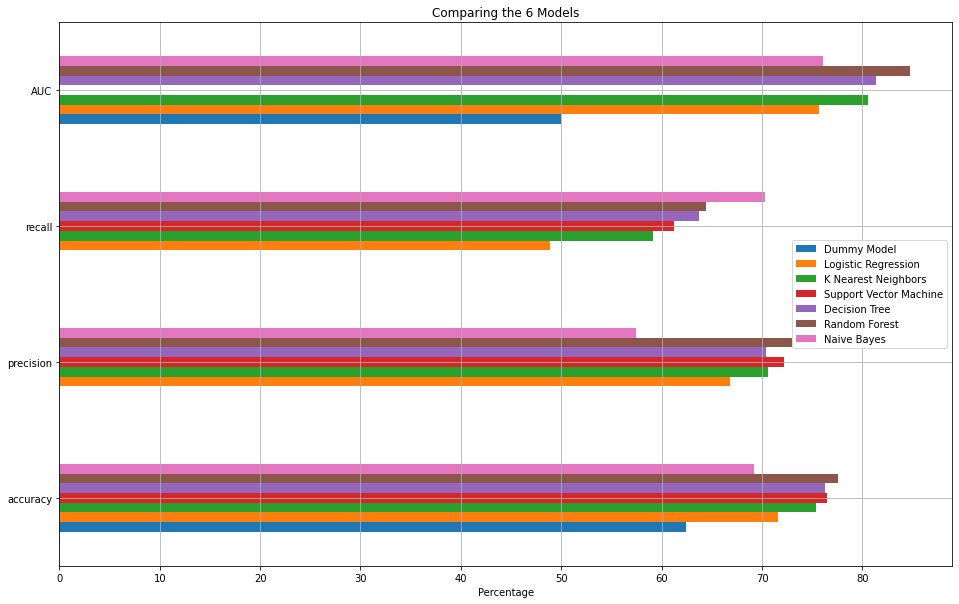

In [42]:
fig, ax = plt.subplots(figsize=(16,10))
actual_metrics.plot(kind='barh', ax=ax)
ax.set_xlabel('Percentage')
ax.set_title('Comparing the 6 Models')
ax.grid();

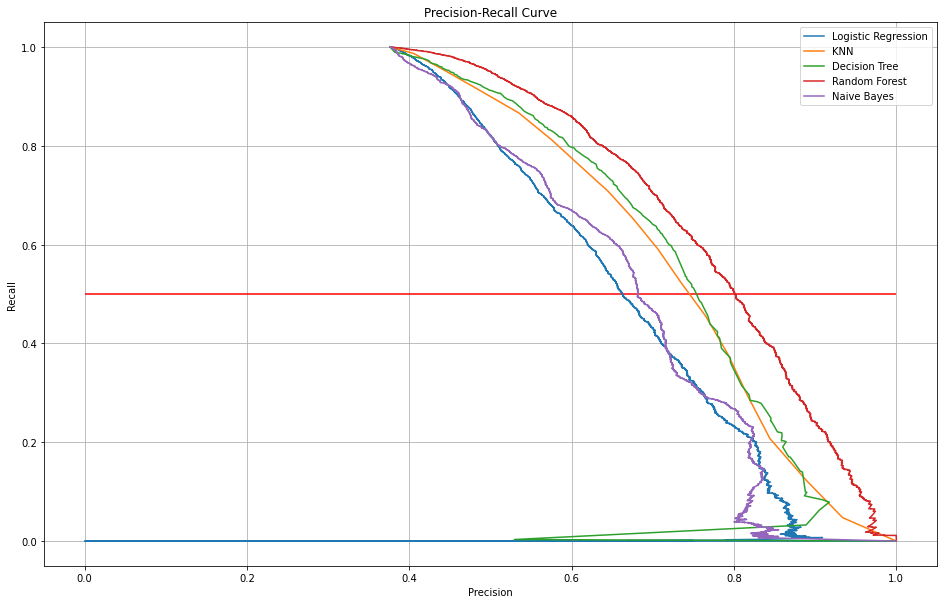

In [43]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test, probas_pred=lr_cv.predict_proba(X_test)[:,1])
precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_true=y_test, probas_pred=knn_cv.predict_proba(X_test)[:,1])
#precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_true=y_test, probas_pred=svm.predict_proba(X_test)[:,1])
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_true=y_test, probas_pred=dt_cv.predict_proba(X_test)[:,1])
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_true=y_test, probas_pred=rf_cv.predict_proba(X_test)[:,1])
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_true=y_test, probas_pred=nb_cv.predict_proba(X_test)[:,1])

fig, ax = plt.subplots(figsize=(16,10))
ax.plot(precision_lr, recall_lr, label='Logistic Regression')
ax.plot(precision_knn, recall_knn, label='KNN')
ax.plot(precision_dt, recall_dt, label='Decision Tree')
ax.plot(precision_rf, recall_rf, label='Random Forest')
ax.plot(precision_nb, recall_nb, label='Naive Bayes')
ax.set_xlabel('Precision')
ax.set_ylabel('Recall')
ax.set_title('Precision-Recall Curve')
ax.hlines(y=0.5, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

In [44]:
rf_cv.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': 20,
 'classifier__max_features': 5,
 'classifier__min_samples_leaf': 7,
 'classifier__min_samples_split': 7,
 'classifier__n_estimators': 50,
 'preprocessor__num__imputer__strategy': 'mean'}

In [45]:
rf_model = rf_cv.best_estimator_


In [46]:
rf_model.named_steps['classifier'].feature_importances_

array([0.06144927, 0.06322304, 0.04175489, 0.06109893, 0.11709574,
       0.04875055, 0.1202273 , 0.09474994, 0.17843249, 0.02138   ,
       0.10553134, 0.01365112, 0.04407969, 0.00022123, 0.02835447])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  int64  
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  int64  
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
 12  was_retained            50000 non-null  int64  
dtypes: bool(1), float64(6), int64(4), object(2)
memory usage: 4.6+ MB


In [48]:
df.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,was_retained
count,50000.000000,50000.00000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,16.54468,4.601559,1.074764,109.334780,8.849536,60.926084,5.796827,4.778158,0.376080
std,3.792684,8.75422,0.617338,0.222336,61.718985,19.958811,37.081503,5.707357,0.446652,0.484405
min,0.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,9.00000,4.300000,1.000000,45.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,17.00000,4.900000,1.000000,128.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,24.00000,5.000000,1.050000,169.000000,8.600000,100.000000,6.940000,5.000000,1.000000
max,125.000000,31.00000,5.000000,8.000000,182.000000,100.000000,100.000000,160.960000,5.000000,1.000000


In [52]:
with open('/content/drive/MyDrive/ultimate_tech_takehome/ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)

df['was_retained'] = (df.last_trip_date >= '2014-06-01')*1
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int) - 20140100
df['last_trip_date'] = (df['last_trip_date'] - min(df['last_trip_date'])).dt.days + 1 

df.phone.fillna('Other', inplace=True)
df['city'] = df['city'].astype('category')
df['phone'] = df['phone'].astype('category')
df = pd.get_dummies(df)

In [53]:
# Imputation
df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean(),inplace=True)
df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean(),inplace=True)

In [54]:
X = df.drop(['was_retained', 'last_trip_date'], axis=1)
y = df['was_retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [55]:
classifier_rf = RandomForestClassifier(random_state=0, criterion='gini', max_depth=20, 
                                       max_features=4, min_samples_leaf=7, min_samples_split=5, n_estimators=100)

It takes 3.736 seconds for Random Forest fitting
Accuracy with Random Foreston the testing set is: 0.778
ROC AUC score is: 0.848
PREDICTION    Not Retained  Retained  Total
TRUE                                       
Not Retained          8032      1327   9359
Retained              1998      3643   5641
Total                10030      4970  15000
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      9359
           1       0.73      0.65      0.69      5641

    accuracy                           0.78     15000
   macro avg       0.77      0.75      0.76     15000
weighted avg       0.78      0.78      0.78     15000



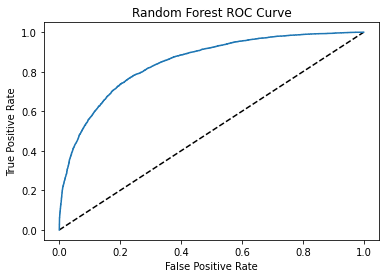

In [56]:
t0 = time.time()
classifier_rf.fit(X_train, y_train)
ttt = time.time() - t0
print("It takes %.3f seconds for %s fitting" % (ttt, 'Random Forest'))

y_pred = classifier_rf.predict(X_test)

print("Accuracy with " + 'Random Forest' + "on the testing set is: %.3f" % classifier_rf.score(X_test, y_test))
    
y_pred_prob = classifier_rf.predict_proba(X_test)[:,1]
print("ROC AUC score is: %.3f" %roc_auc_score(y_test, y_pred_prob))

print(Conf_Matrix(confusion_matrix(y_test, y_pred)))
print(classification_report(y_test, y_pred))


fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s ROC Curve' % 'Random Forest')
plt.show()

In [57]:
pd.DataFrame(classifier_rf.feature_importances_, 
             index = X_train.columns, columns = ['importance']).sort_values('importance', ascending=False)

,importance
avg_rating_by_driver,0.151980
weekday_pct,0.130413
surge_pct,0.112422
city_King's Landing,0.098508
avg_dist,0.089670
avg_surge,0.083304
trips_in_first_30_days,0.062173
signup_date,0.059697
ultimate_black_user,0.052550
avg_rating_of_driver,0.041451


In [58]:

display(df['avg_rating_by_driver'].corr(df['was_retained']))
display(df['surge_pct'].corr(df['was_retained']))
display(df['weekday_pct'].corr(df['was_retained']))

-0.02674804280606978

0.011796748066780126

0.009692972843291884

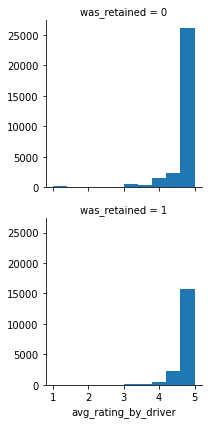

In [59]:
g = sns.FacetGrid(df, row='was_retained')
g = g.map(plt.hist, "avg_rating_by_driver")

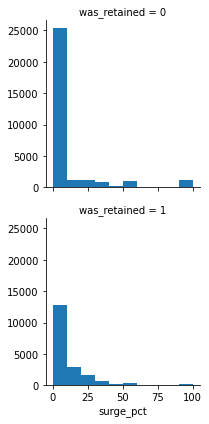

In [60]:
g = sns.FacetGrid(df, row='was_retained')
g = g.map(plt.hist, "surge_pct")

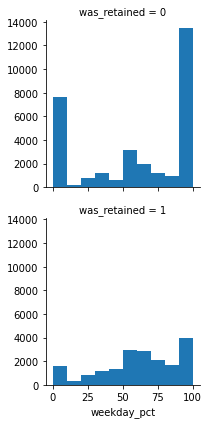

In [61]:
g = sns.FacetGrid(df, row='was_retained')
g = g.map(plt.hist, "weekday_pct")